<div style="max-width:600px">

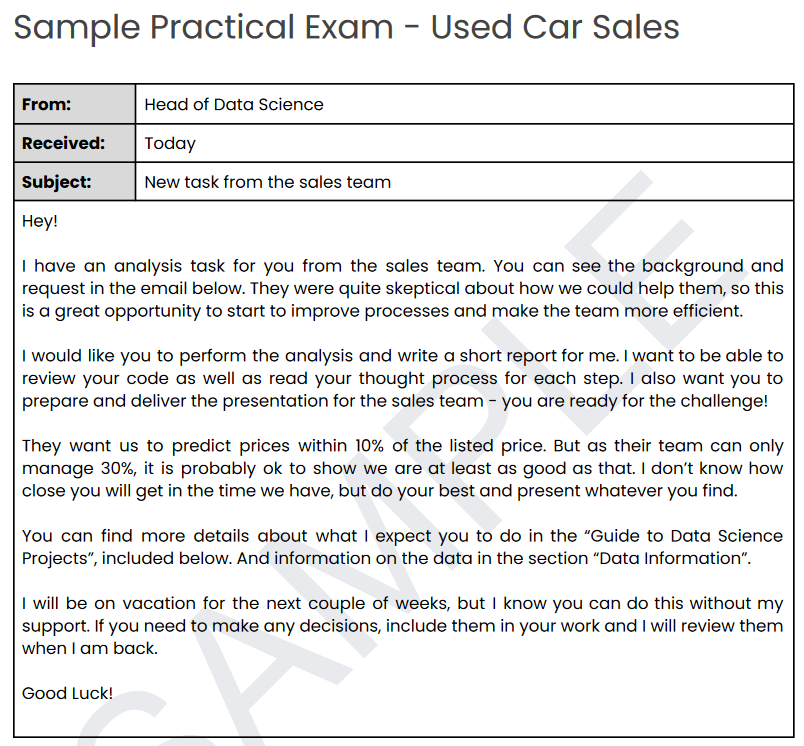

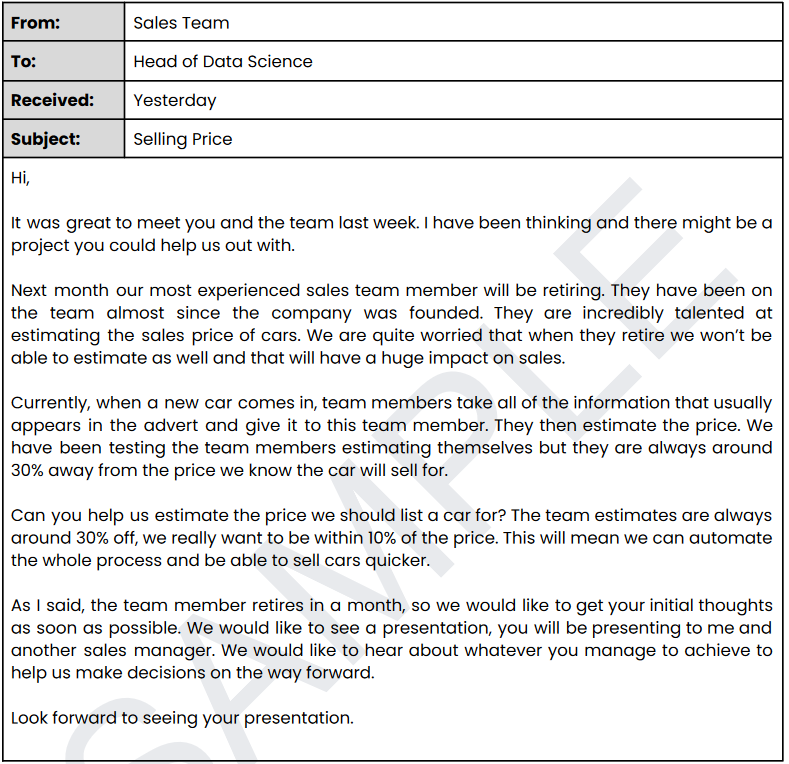

</div>

# Company Background

Discount Motors is a used car dealership in the UK. They want to lead the way in used cars.
Selling to customers who want the latest and greatest features, without the price tag of a
brand new car.

The UK Government has now announced that from 2030 all new cars will be required to be
zero emissions. Although this won’t impact the used car market, it is expected that buyers will
give more consideration to the future value of their cars. And petrol and diesel will likely have
a much lower value after 2030.

# UK Used Car Sales

The details in the data reflect the information given to potential buyers in the website adverts.

### Buyers typically want to know the road tax of a used car, which varies based on a combination of year registered, emissions and fuel type, with Electric cars currently exempt from road tax.

<div style="max-width:400px">

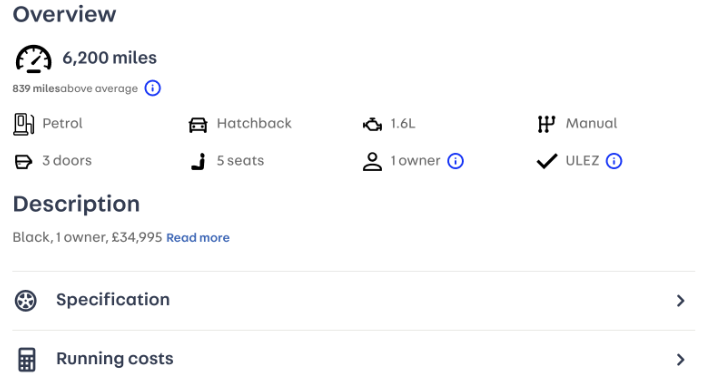
</div>
Example of a used car advert from AutoTrader: https://www.autotrader.co.uk/car-details/202211211870961

## Data Information

- The sales team has pulled some data from the website listings from the last 6 months. 
- All cars listed in this data were sold at the price listed.
- I think there is also a lot of information missing that could be useful to us.
- You can download the data from here (dataset in dataset folder).
- I will let you decide how to process it, just make sure you include all your decisions in your report.
- The data hasn’t been validated, so make sure that you check it against all of the information in the table before you start your analysis.

## Guide to Data Science Projects
1. I would like you to create a written report to summarize the analysis you have performed and your findings. The report will be read by me (Head of Data Science). The list below describes what I expect to see in your written report.
2. You will need to use DataCamp Workspace to complete your analysis, write up your findings and share visualizations.
3. You must use the data provided for the analysis.
4. You will also need to prepare and deliver a presentation. You should prepare around 8-10 slides to present to the product manager. The list below describes what they expect to see in your presentation.
5. Your presentation should be no longer than 10 minutes.

## Written Report

Your written report should include written text summaries and graphics of the following:
- Data validation:
    - Describe validation and cleaning steps for every column in the data
- Exploratory Analysis to answer the customer questions ensuring you include:
    - Two different types of graphic showing single variables only
    - At least one graphic showing two or more variables
    - Description of your findings
- Model Development including:
    - What type of problem this is
    - Fitting a baseline model
    - Fitting a comparison model
- Model evaluation
    - Show how the two models compare
- Definition of a metric for the business to monitor
    - How should the business monitor what they want to achieve?
    - Estimate the initial value(s) for the metric based on the current data?
- Final summary including recommendations that the business should undertake

## Presentation

You will give an overview presentation to the product manager who requested the work. The presentation should include:
- An overview of the project and business goals
- A summary of the work you undertook and how this addresses the problem
- Your key findings including the metric to monitor and current estimation
- Your recommendations to the business

## Grading
Before submitting your written report or delivering your presentation, remember to check your work against the grading criteria.

You can find the full grading rubric here (https://app.datacamp.com/certification/resource-center/practical-exam-resources#data-analyst-professional).

You must pass all criteria to pass this part of the certification.

<div style="max-width:500px">

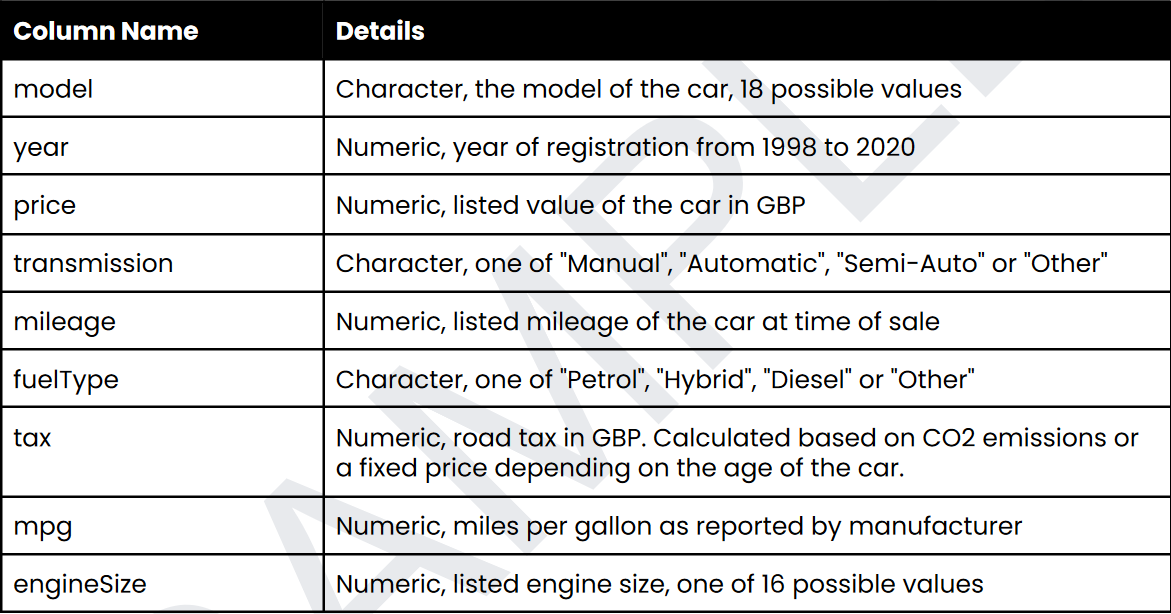
</div>

# 1. Preprocessing (cleaning).
## 1.1 First review

### Summary

1. No missing values in the dataset (checked with df.info(): all variables have 6738 non-null values)
2. It looks like all variables excluding 'mpg' and 'engineSize' require preprocessing 
3. 'mpg' variable most likely has at least one outlier because the min mpg is 2.8 which does not seem realistic
    - max mpg is 235 which is the 
4. 'engineSize' has a few outliers, because the engine size is 0.0 for 6 cars

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget
%matplotlib inline

# Setting a number of columns to display
pd.set_option('display.max_columns', None)   # Set to None to display all columns
pd.set_option('display.width', 1000)         # Set width to a high value to display columns next to each other

df = pd.read_csv("datasets/toyota.csv")

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [383]:
# Checking if the 'model' has 18 possible values (True)
df['model'].value_counts().count()
# Checking if 'year' (of registration) spans from 1998 to 2020 (True)
df['year'].value_counts()
# Checking 'price' (values look OK)
df['price'].describe() 
# Checking 'transmission' (True)
df['transmission'].value_counts()
# Checking 'mileage' (values look OK)
df['mileage'].describe()
# Checking 'fuelType'
df['fuelType'].value_counts()
# Checking 'tax' (values look OK)
df['tax'].value_counts()
# Checking 'mpg': looks like there is an outlier because the min mpg is 2.8 which does not seem realistic
df['mpg'].describe()
# Checking 'engineSize': looks like there is an outlier, because the engine size is 0.0 for 6 cars
df['engineSize'].value_counts()

1.0    2059
1.5    1423
1.8    1289
1.3     601
2.0     398
1.2     303
2.5     249
1.6     169
2.4      70
2.2      58
1.4      40
2.8      36
3.0      35
0.0       6
4.2       1
4.5       1
Name: engineSize, dtype: int64

## 1.2 Further inspection of 'model', 'mpg' and 'engineSize' variables  

### Summary: 
1. For my own convenience I am converting mpg to l / 100km and renaming the variable 'mpg' to 'lper100km'
2. It looks like we should search the variables and strip the spaces from all strings if any
3. It also looks like the Hilux and C-HR models have a bad mpg (lper100km) inserted.
    - This can be found by executing: "print(df[df['lper100km'] > 15])"
    - For these occurences I will impute the mean value for each model (excluding the outlier from the mean)
4. As mentioned in the title the 'engineSize' variable has a few outliers (size of 0.0).
    - This can be found by executing: "df['engineSize'].value_counts()"
    - For these occurences I will impute the mean engineSize for each model (also excluding the outlier from the mean)

### 1.2.1 Converting to l / 100 km

In [384]:
# Converting mpg to l/100km for my own convenience
df['mpg'] = (282.48 / df['mpg'])
df.columns = ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'lper100km', 'engineSize']

### 1.2.2 Stripping spaces from 'model'

In [385]:
# Stripping all spaces from 'model' variable
df['model'] = df['model'].str.strip()

### 1.2.3 Imputing mean value of 'lper100km' (exluding the outliers from the mean)

In [386]:
# These are all the outliers for 'lper100km'
print(df[df['lper100km'] > 15])

      model  year  price transmission  mileage fuelType  tax   lper100km  engineSize
5966   C-HR  2018  16690       Manual    16429   Petrol  145   47.080000         1.2
6552  Hilux  2019  28495    Automatic     3350   Diesel  260  100.885714         2.4
6562  Hilux  2020  18495       Manual       50   Diesel  260  100.885714         2.4
6563  Hilux  2020  23495       Manual      100   Diesel  260  100.885714         2.4
6575  Hilux  2019  26500    Automatic     7123   Diesel  260  100.885714         2.4
6576  Hilux  2019  20500       Manual     5190   Diesel  260  100.885714         2.4
6583  Hilux  2019  26995    Automatic        4   Diesel  265  100.885714         2.4
6594  Hilux  2020  39257    Automatic     1259   Diesel  265  100.885714         2.4
6595  Hilux  2019  27850    Automatic    10250   Diesel  260  100.885714         2.4
6596  Hilux  2020  30500    Automatic     5000   Diesel  260  100.885714         2.4
6617  Hilux  2020  36995    Automatic      150   Diesel  260  100

In [387]:
# calculate the mean for lper100km column for C-HR category
chr_mean_lper100km = df.loc[(df['model'] == 'C-HR') & (df['lper100km'] < 15), 'lper100km'].mean()

# replace outlier values with the mean using loc method
df.loc[(df['lper100km'] > 15) & (df['model'] == 'C-HR'), 'lper100km'] = chr_mean_lper100km
print(df[df['lper100km'] > 15])

      model  year  price transmission  mileage fuelType  tax   lper100km  engineSize
6552  Hilux  2019  28495    Automatic     3350   Diesel  260  100.885714         2.4
6562  Hilux  2020  18495       Manual       50   Diesel  260  100.885714         2.4
6563  Hilux  2020  23495       Manual      100   Diesel  260  100.885714         2.4
6575  Hilux  2019  26500    Automatic     7123   Diesel  260  100.885714         2.4
6576  Hilux  2019  20500       Manual     5190   Diesel  260  100.885714         2.4
6583  Hilux  2019  26995    Automatic        4   Diesel  265  100.885714         2.4
6594  Hilux  2020  39257    Automatic     1259   Diesel  265  100.885714         2.4
6595  Hilux  2019  27850    Automatic    10250   Diesel  260  100.885714         2.4
6596  Hilux  2020  30500    Automatic     5000   Diesel  260  100.885714         2.4
6617  Hilux  2020  36995    Automatic      150   Diesel  260  100.885714         2.4


In [388]:
# calculate the mean for lper100km column for C-HR category
hilux_mean_lper100km = df.loc[(df['model'] == 'Hilux') & (df['lper100km'] < 15), 'lper100km'].mean()

# replace outlier values with the mean using loc method
df.loc[(df['lper100km'] > 15) & (df['model'] == 'Hilux'), 'lper100km'] = hilux_mean_lper100km
print(df[df['lper100km'] > 15])

# As result of step 1.2.2 there are no outliers for 'lper100km' left

Empty DataFrame
Columns: [model, year, price, transmission, mileage, fuelType, tax, lper100km, engineSize]
Index: []


### 1.2.4 Dealing with the 'engineSize' variable (0.0 size)

In [389]:
# These are all the outliers for 'engineSize'
print(df[df['engineSize'] == 0.0])

      model  year  price transmission  mileage fuelType  tax  lper100km  engineSize
2535  Yaris  2016  12300       Manual     6148   Hybrid    0   3.284651         0.0
2545  Yaris  2016  11000    Automatic    39909   Hybrid    0   3.284651         0.0
5126   Aygo  2019   9800       Manual     3635   Petrol  150   4.999646         0.0
5233   Aygo  2019   8000       Manual     8531   Petrol  145   4.999646         0.0
5257   Aygo  2019   8000       Manual     5354   Petrol  145   4.999646         0.0
5960   C-HR  2017  14300       Manual    46571   Petrol  145   5.997452         0.0


In [390]:
# calculate the median for engineSize column for 'Yaris', 'Aygo' and 'C-HR' category
yaris_median_engineSize = df.loc[(df['engineSize'] != 0.0) & (df['model'] == 'Yaris'), 'engineSize'].median()
aygo_median_engineSize = df.loc[(df['engineSize'] != 0.0) & (df['model'] == 'Aygo'), 'engineSize'].median()
chr_median_engineSize = df.loc[(df['engineSize'] != 0.0) & (df['model'] == 'C-HR'), 'engineSize'].median()
print(yaris_median_engineSize)
print(aygo_median_engineSize)
print(chr_median_engineSize)

# Replace the outliers with the median values
df.loc[(df['engineSize'] == 0.0) & (df['model'] == 'Yaris'), 'engineSize'] = yaris_median_engineSize
df.loc[(df['engineSize'] == 0.0) & (df['model'] == 'Aygo'), 'engineSize'] = aygo_median_engineSize
df.loc[(df['engineSize'] == 0.0) & (df['model'] == 'C-HR'), 'engineSize'] = chr_median_engineSize

1.5
1.0
1.8


In [391]:
# Sanity check for 'engineSize' outliers:
print(df[df['engineSize'] == 0.0])

Empty DataFrame
Columns: [model, year, price, transmission, mileage, fuelType, tax, lper100km, engineSize]
Index: []


# 2. Exploratory Analysis.

- Exploratory Analysis to answer the customer questions ensuring you include:
    - Two different types of graphic showing single variables only
    - At least one graphic showing two or more variables
    - Description of your findings

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   lper100km     6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


## 2.1 First graphic (one variable)

### Summary
- Plot below shows the distribution of mpg (lper100km) and price variables (boxplot)
#### l/100km
- The graph on the left hand side corresponds to the fuel consumption distribution among the cars
- The box shows that the middle 50% of the cars have fuel consumption from about 4 to 5 liters per 100 km
- The median fuel consumption is about 4.4 l/100km
- The range of the data (excluding outliers) is shown by the 'whiskers' and spans from 3 to 6.4 l/100km.
- Upper outliers: 6.4 to 12 l/100km
- Lower outliers: around 2 l/100km and below.

#### price
- The graph on the right hand side corresponds to the price of the cars
- The box shows that the middle 50% of the cars cost from about 90000 to 15000 GBP
- The median price for all models is around 11000 GBP
- The range of the data (excluding outliers) is shown by the 'whiskers' and spans from 900GBP (old cars) to 26000 GBP
- Cars more expensive than the upper whisker are considered outliers but they look realistic (mostly quite new and good brands)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


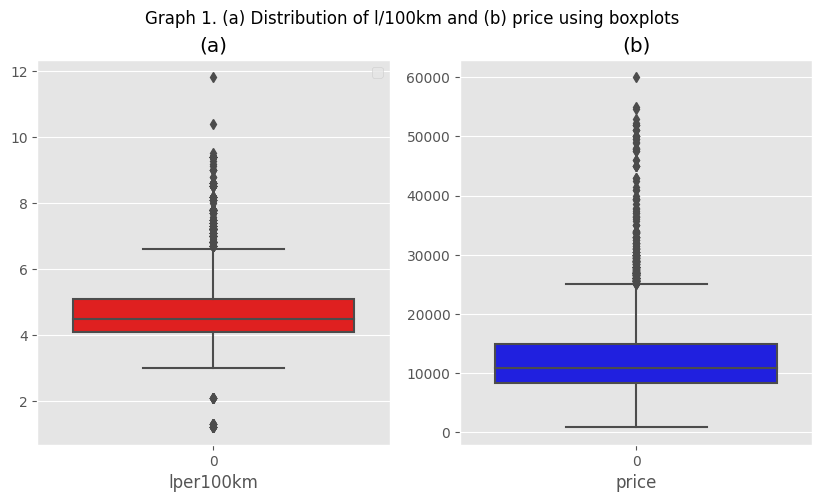

In [393]:
# set the ggplot style
plt.style.use('ggplot')

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, 
                               sharey=False, figsize=(10,5))
sns.boxplot(df['lper100km'],color='r', ax=ax0)
sns.boxplot(df['price'], color='b', ax=ax1)

ax0.set(xlabel='lper100km')
ax1.set(xlabel='price')

# ax0.axvline(x=3000, label='Threshold', linestyle='--')
# ax0.axvline(x=18000, label='Outlier with most reviews', linestyle='--', color='red')
fig.suptitle("Graph 1. (a) Distribution of l/100km and (b) price using boxplots")
ax0.set_title('(a)')
ax1.set_title('(b)')
ax0.legend()

In [394]:
print(df[(df['price'] > 30000) & (df['year'] < 2015)])

             model  year  price transmission  mileage fuelType  tax  lper100km  engineSize
6679  Land Cruiser  2014  30442    Automatic    36137   Diesel  325   8.093983         3.0
6698  Land Cruiser  2014  44990    Automatic    60000   Diesel  540   9.511111         4.5


## 2.2 Second graphic (one variable)

### Summary
- Plot below shows the distribution of mpg (lper100km) and price variables (histogram)
- Both variables have characteristics of a normal distribution
- Since there are not a lot of series I have done a log transformation on the target variable and plotted in graph 2.2 but it probably may not make a lot of sense to do that as the bins are still quite split away

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


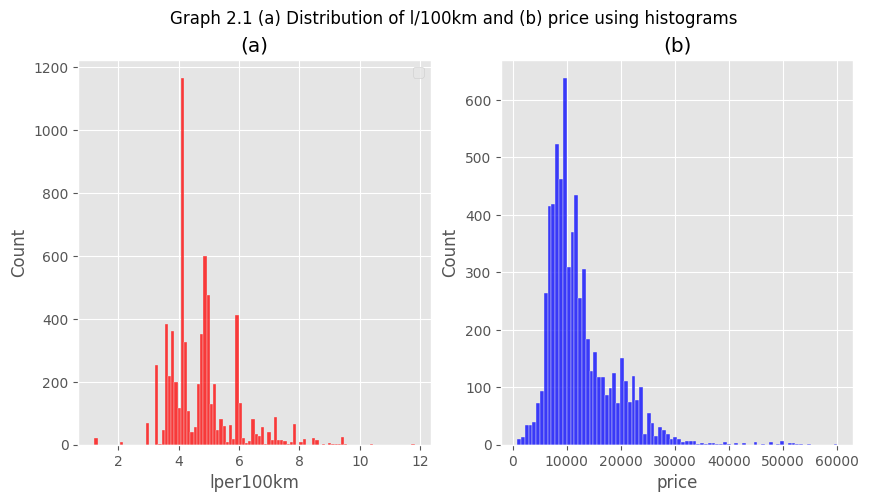

In [395]:
# set the ggplot style
plt.style.use('ggplot')

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, 
                               sharey=False, figsize=(10,5))
sns.histplot(df['lper100km'], color='r', ax=ax0)
sns.histplot(df['price'], color='b', ax=ax1)

ax0.set(xlabel='lper100km')
ax1.set(xlabel='price')

# ax0.axvline(x=3000, label='Threshold', linestyle='--')
# ax0.axvline(x=18000, label='Outlier with most reviews', linestyle='--', color='red')
fig.suptitle("Graph 2.1 (a) Distribution of l/100km and (b) price using histograms")
ax0.set_title('(a)')
ax1.set_title('(b)')
ax0.legend()

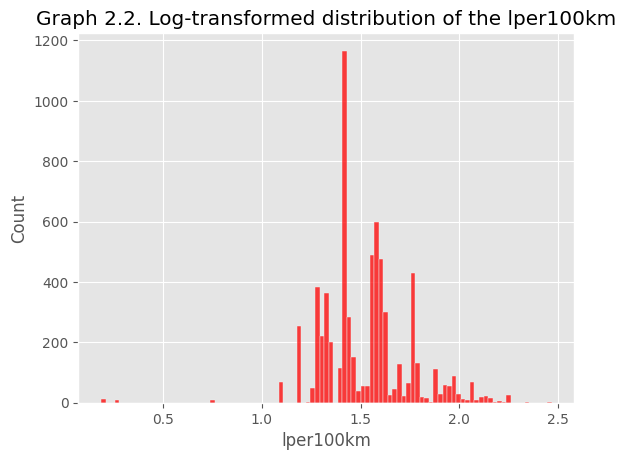

In [396]:
sns.histplot(np.log(df['lper100km']), color='r').set(title='Graph 2.2. Log-transformed distribution of the lper100km')
plt.show()

## 2.3 Third graphic (two variables)

### Summary
- Plot below represents the average price for each model
- On average Supra is most expensive and IQ is the cheapest

C:\Users\macko\AppData\Local\Temp\ipykernel_6300\2564752024.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouping.model, rotation=90)


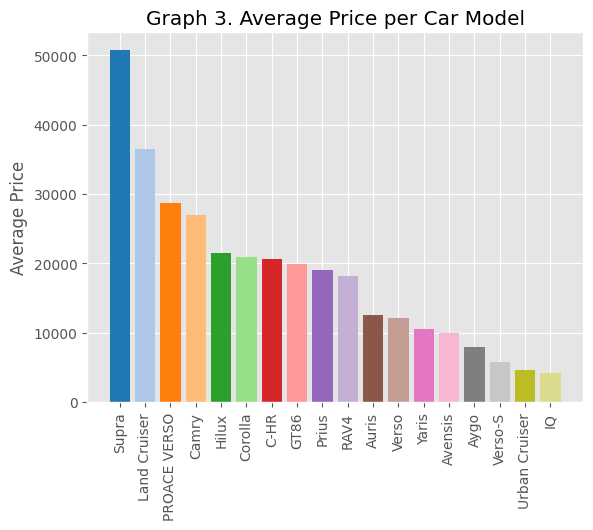

In [397]:
import matplotlib.pyplot as plt
import numpy as np
# set the ggplot style
plt.style.use('ggplot')

# group data by model and calculate the mean price
grouping = df.groupby('model', as_index=False)['price'].agg(np.mean)
grouping = grouping.sort_values('price', ascending=False)

# create the bar plot with the 'tab20' colormap
fig, ax = plt.subplots()
bars = ax.bar(grouping['model'], grouping['price'], color=plt.cm.tab20(np.arange(len(grouping))))

# set the x-axis labels and rotation, and axis titles
ax.set_xticklabels(grouping.model, rotation=90)
ax.set_ylabel('Average Price')
# ax.set_xlabel('Model')
ax.set_title('Graph 3. Average Price per Car Model')

# show the plot
plt.show()

# 3. Model Development including:
## 3.1 What type of problem this is

- That is a regression problem given that the target variable mpg (here lper100km) is numeric
- We will have to encode the categorical variables to feed them into the model 

## 3.2 Fitting a baseline model

### 3.2.1 Selecting and encoding predictors 

In [398]:
# Selecting the predictors; get_dummies()
predictors = df[['model', 'transmission', 'fuelType']]
predictors_dummies = pd.get_dummies(predictors)

# Concatenating and dropping to get the dataset ready for the model
df_model = pd.concat([df, predictors_dummies],axis=1)
df_model = df_model.drop(['model', 'transmission', 'fuelType'], axis=1)

# Selecting the predictors
features = [feat for feat in list(df_model) if feat != 'lper100km']

X = df_model[features]

# print(X.shape)
X.head()

,year,price,mileage,tax,engineSize,model_Auris,model_Avensis,model_Aygo,model_C-HR,model_Camry,model_Corolla,model_GT86,model_Hilux,model_IQ,model_Land Cruiser,model_PROACE VERSO,model_Prius,model_RAV4,model_Supra,model_Urban Cruiser,model_Verso,model_Verso-S,model_Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2017,15995,18615,145,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2015,13998,27469,265,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,2017,18998,14736,150,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2017,17498,36284,145,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


### 3.2.2 Selecting target variable 

In [399]:
# Selecting the target variable: 'lper100km'
y = df_model['lper100km']

print(y.shape)

(6738,)


### 3.2.3 Train-test split

In [403]:
# Import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2.4 Fitting a baseline model

In [404]:
# Instantiate the model
linreg = LinearRegression()

# Fit the model
linreg.fit(X_train, y_train)

# Making predictions on test set
y_pred_linreg = linreg.predict(X_test)

## 3.3 Fitting a comparison model

In [457]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                            max_depth=20,
                            min_samples_split=10,
                            min_samples_leaf=10,
                            random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [462]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Instantiate a comparison model
rf = RandomForestRegressor(random_state=42)

# Define the grid of parameters
params_rf = {'n_estimators': [100,350,500],
             'max_features': ['log2', 1.0 , 'sqrt'],
             'max_depth': [4,6,8],
             'min_samples_leaf': [2, 10, 30]}

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 1.0, 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [463]:
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters: \n', best_hyperparams)

Best hyperparameters: 
 {'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 2, 'n_estimators': 100}


In [464]:
best_model = grid_rf.best_estimator_

# Predicing using the best model
y_pred_rf = best_model.predict(X_test)

- I am choosing the Linear Regression model as a baseline model for linear regression problems. 
- The comparison model I am choosing is the RandomForestRegressor because it can capture more complex relationship between the input features and the target variables.

# 4. Model evaluation
Show how the two models compare
- Definition of a metric for the business to monitor
    - How should the business monitor what they want to achieve?
    - Estimate the initial value(s) for the metric based on the current data?
- Final summary including recommendations that the business should undertake

## 4.1 Definition of the metric for the business to monitor

    The metric used for the model evaluation and the one selected for the business to monitor is the RMSE (Root Mean Squared Error). RMSE is considered to be the roof of the average squared distance between the predicted values and true values.

### 4.1.1 Comparison using RMSE as evaluation metric

In [465]:

rmse_linreg = mean_squared_error(y_test, y_pred_linreg, squared=False)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Linear Regression RMSE is: {rmse_linreg} \nRandom Forest Regressor RMSE is: {rmse_rf}")

Linear Regression RMSE is: 0.47102629062493273 
Random Forest Regressor RMSE is: 0.22432659881731196


- To monitor the performance of the models, the business should use a validation dataset that was not used during training.
    - Here, we applied the train_test_split with test dataset size of 20% and train size of 80%. 
- The dataset should be representative of the real-world data that the models will be applied to. 
    - As described, data were pulled from the website listings from the last 6 months
- The business should track the chosen metric for both models on this validation dataset
    - The best_model, selected using the GridSearchCV valiadation, was used to make predictions on X_test dataset. 
- The model with the lower value of the metric is considered to perform better.
    - Here, the best performance is achieved with Random Forest Regressor with RMSE of 0.2243.

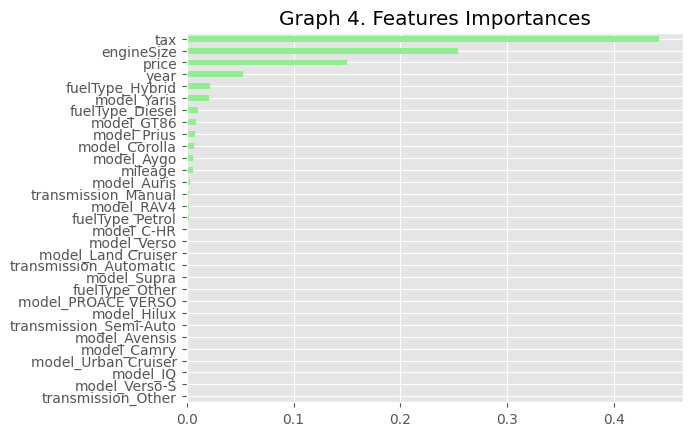

In [468]:
# Create a pd.Series of features importances
importances = pd.Series(data=best_model.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()
# Draw a horizontal barplot of importances_sorted

importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Graph 4. Features Importances')
plt.show()

- Based on the evaluation results, the business should select the model with the lower value of the chosen metric. 
- The difference in performance is significant, the Random Forest Regressor performance is higher (47% vs. 22%). 
- Although 10% efficiency have not been achieved, it the average RMSE calculated by the model is close to 20%.
- As of recomendations, the business should periodically re-evaluate the performance of the chosen model on new data to ensure that it continues to provide accurate predictions.
- Graph 4 shows the feature importance that might be hapeful for the business to evaluate the impact of each feature on the model's performance. Most notably, the business should follow closely and measure accurately variables 'tax', 'engineSize', 'price', and 'year', as these have the highest impact on the RMSE metric. 